In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import font_manager
from matplotlib import rcParams
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap


In [20]:
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")


['C:\\Windows\\Fonts\\TCB_____.TTF',
 'C:\\Windows\\Fonts\\ARIALNB.TTF',
 'C:\\Windows\\Fonts\\BELLI.TTF',
 'C:\\windows\\Fonts\\MTCORSVA.TTF',
 'C:\\Windows\\Fonts\\CALISTI.TTF',
 'C:\\Windows\\Fonts\\CALIFB.TTF',
 'C:\\Windows\\Fonts\\LEELAWDB.TTF',
 'C:\\Windows\\Fonts\\couri.ttf',
 'C:\\Windows\\Fonts\\segoeprb.ttf',
 'C:\\windows\\Fonts\\Ancizar Serif-Bold Italic.otf',
 'C:\\Windows\\Fonts\\PERI____.TTF',
 'C:\\windows\\Fonts\\REFSAN.TTF',
 'C:\\Users\\Stephanie\\AppData\\Local\\Microsoft\\Windows\\Fonts\\CartographCF-LightItalic.otf',
 'C:\\Windows\\Fonts\\FRAHV.TTF',
 'C:\\windows\\Fonts\\msjhl.ttc',
 'C:\\windows\\Fonts\\STENCIL.TTF',
 'C:\\windows\\Fonts\\seguiemj.ttf',
 'C:\\Windows\\Fonts\\courbd.ttf',
 'C:\\windows\\Fonts\\WINGDNG3.TTF',
 'C:\\Windows\\Fonts\\TCCM____.TTF',
 'C:\\windows\\Fonts\\CENTURY.TTF',
 'C:\\windows\\Fonts\\FORTE.TTF',
 'C:\\Users\\Stephanie\\AppData\\Local\\Microsoft\\Windows\\Fonts\\CartographCF-ExtraBoldItalic.otf',
 'C:\\Windows\\Fonts\\micross.t

In [21]:
import numpy as np

In [22]:
font_dir = ['C:\\Windows\\Fonts']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
# font_manager.findfont("Ancizar") # Test with "Special Elite" too

In [23]:
rcParams['font.family'] = 'Ancizar Sans'


In [129]:
#import data .txt file and read it into a numpy array

def read_data(filename):
    data = np.loadtxt('../data/first_data_set/'+filename+'.txt', delimiter=' ')
    return data

def read_data_orbit(filename):
    data = np.loadtxt('../data/first_data_set/'+filename+'.txt', delimiter=' ', usecols=range(0, 12))
    return data
#Data files belong to cold dark matter halo simulations of Milky Way particles interacting with the Large Magellanic Cloud (LMC)
#mw prefix is for MW particles in the non interacting regime
#lmc prefix is for MW particles in perturbed dark matter halo

data_mw = read_data('rand_mwb1_110')
data_lmc = read_data('rand_mwlmcb1_110')
data_lmc_orbit = read_data_orbit('LMC5_100Mb1_orbit')



#Potential energy of particles in dark matter halo
# pot_mw = data_mw[:,6]
# pot_mw_lmc = data_lmc[:,6]

#Extract velocity magnitude of particles in dark matter halo
v_mw = data_mw[:,3:6]
v_mw_lmc = data_lmc[:,3:6]

#Get position of particles in Milky Way's dark matter halo
pos_mw = data_mw[:,0:3]
pos_mw_lmc = data_lmc[:,0:3]

pos_lmc_orbit = data_lmc_orbit[:,6:9]
pos_mw_orbit = data_lmc_orbit[:,0:3]



In [29]:
# density_yz_mw = np.histogram2d(pos_mw[:,1], pos_mw[:,2], bins=np.linspace(-150,150,150))[0]
# density_yz_lmc = np.histogram2d(pos_mw_lmc[:,1], pos_mw_lmc[:,2], bins=np.linspace(-150,150,150))[0]
# density_yz_lmc_50 = np.histogram2d(pos_mw_lmc_50[:,1], pos_mw_lmc_50[:,2], bins=np.linspace(-150,150,150))[0]

# density_yz_lmc = np.histogram2d(pos_mw_lmc_50[:,1], pos_mw_lmc_50[:,2], bins=np.linspace(-200,200,200))
density_yz_lmc = np.histogram2d(pos_mw_lmc[:,1], pos_mw_lmc[:,2], bins=np.linspace(-200,200,200))
density_yz_mw = np.histogram2d(pos_mw[:,1], pos_mw[:,2], bins=np.linspace(-200,200,200))
# density_yz_mw = np.histogram2d(pos_mw_50[:,1], pos_mw_50[:,2], bins=np.linspace(-200,200,200))

nparticles_yz_lmc = density_yz_lmc[0]
# nparticles_yz_lmc_2 = density_yz_lmc_2[0]
# nparticles_yz_mw_2 = density_yz_mw_2[0]
nparticles_yz_mw = density_yz_mw[0]


div_yz_lmc = (nparticles_yz_lmc/nparticles_yz_mw)-1
# div_yz_lmc_2 = (nparticles_yz_lmc_2/nparticles_yz_mw)-1
# div_yz_lmc_3 = (nparticles_yz_lmc/nparticles_yz_mw_2)-1
sus_yz_lmc = nparticles_yz_lmc-nparticles_yz_mw


C:\Users\Stephanie\AppData\Local\Temp\ipykernel_23184\1155856237.py:16: RuntimeWarning: divide by zero encountered in divide
  div_yz_lmc = (nparticles_yz_lmc/nparticles_yz_mw)-1
C:\Users\Stephanie\AppData\Local\Temp\ipykernel_23184\1155856237.py:16: RuntimeWarning: invalid value encountered in divide
  div_yz_lmc = (nparticles_yz_lmc/nparticles_yz_mw)-1


In [41]:
def hist_comparison (density,figname):
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    # ax.set_prop_cycle(color=bi_pride(np.linspace(0,1,10)))
    
    # im = ax.imshow(density, vmin=-0.2, vmax=0.2, cmap=get_continuous_cmap(other_cmap), extent=[-150,150,-150,150])
    # im = ax.imshow(density, vmin=-0.2, vmax=0.2, cmap=get_continuous_cmap(orange_purple), extent=[-200,200,-200,200])
    
    # im = ax.imshow(density, vmin=-0.2, vmax=0.2, cmap=get_continuous_cmap(violet_blue), extent=[-200,200,-200,200])
    im = ax.imshow(density, vmin=-0.2, vmax=0.2, extent=[-200,200,-200,200])
    
    
    # im = ax.imshow(density,vmin=-0.2, vmax=0.2, extent=[-150,150,-150,150])
    ax.set_xlabel(r'y [$\mathrm{kpc}$]', fontsize=18)
    ax.set_ylabel(r'z [$\mathrm{kpc}$]', fontsize=18)
    major_ticks = np.arange(-200, 200, 10)
    minor_ticks = np.arange(-200, 200, 2)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    # ax.grid(which='both')
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)
    plt.xticks(rotation = 'vertical')
    plt.colorbar(im, ax=ax,fraction=0.046, pad=0.04, cmap='viridis')
    plt.suptitle("Contraste de densidad en plano yz de partículas del halo", fontsize=25)
    fig.subplots_adjust(top=0.3, bottom=0.15, hspace=1.5)
    fig.tight_layout()
    # plt.gca().invert_yaxis()
    plt.savefig('./../media/imgs/hist_comparison/'+figname+'.png', bbox_inches='tight', dpi = 400)
    plt.show()
    plt.close()
    return 0

In [137]:
def hist_contour (density,figname):
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    # im = ax.imshow(density, vmin=-0.2, vmax=0.2, extent=[-200,200,-200,200])
    ax.set_xlabel(r'y [$\mathrm{kpc}$]', fontsize=18)
    ax.set_ylabel(r'z [$\mathrm{kpc}$]', fontsize=18)
    major_ticks = np.arange(-200, 200, 10)
    minor_ticks = np.arange(-200, 200, 2)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    # ax.grid(which='both')
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)
    plt.xticks(rotation = 'vertical')
    # plt.colorbar(im, ax=ax,fraction=0.046, pad=0.04, cmap='viridis')
    plt.contourf(density, 3, cmap='viridis', vmin=-0.2, vmax=0.2)
    plt.scatter(100,100, c='r', marker='x', s=100)
    # plt.colorbar()
    plt.suptitle("Contorno de densidad partículas en plano yz", fontsize=25)
    # fig.subplots_adjust(top=0.3, bottom=0.15, hspace=1.5)
    fig.tight_layout()
    plt.savefig('./../media/imgs/hist_contour/'+figname+'.png', bbox_inches='tight', dpi = 400)
    

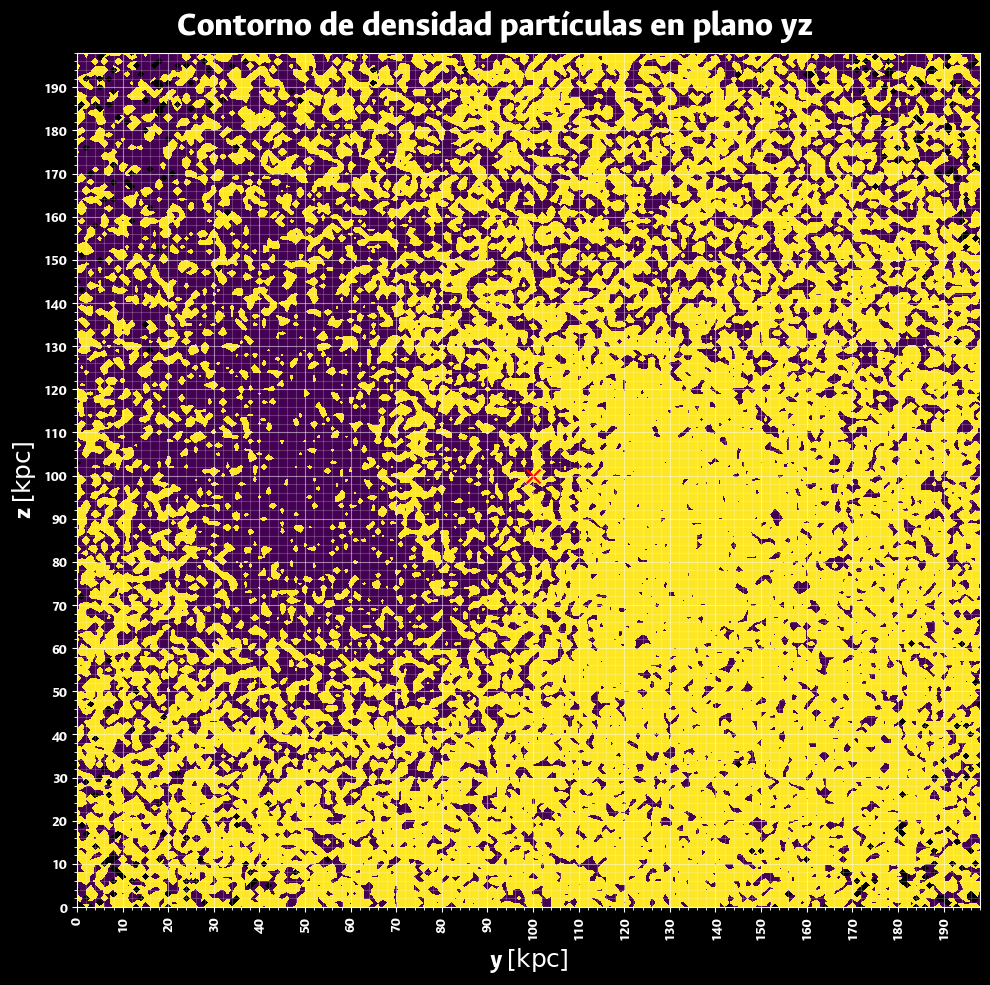

In [136]:
hist_contour(div_yz_lmc,'contorno_div_yz_lmc')

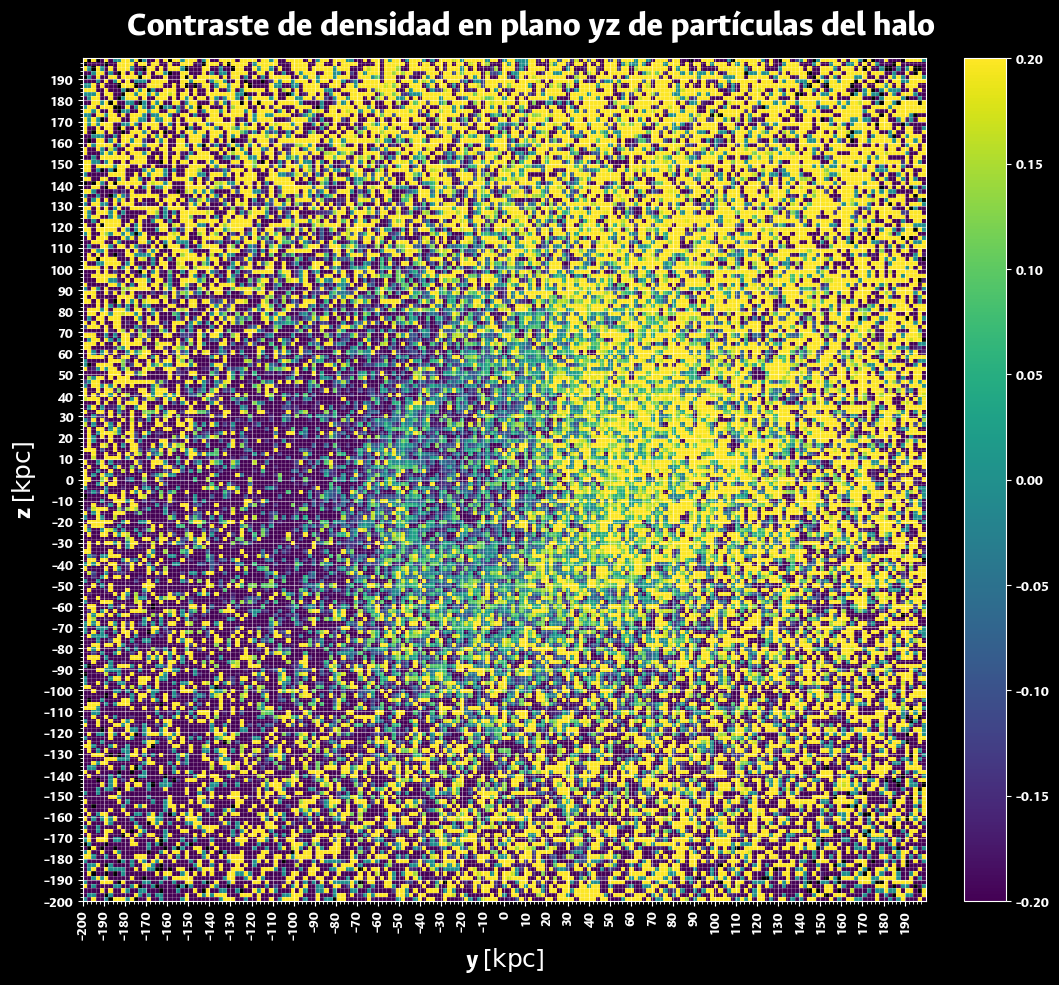

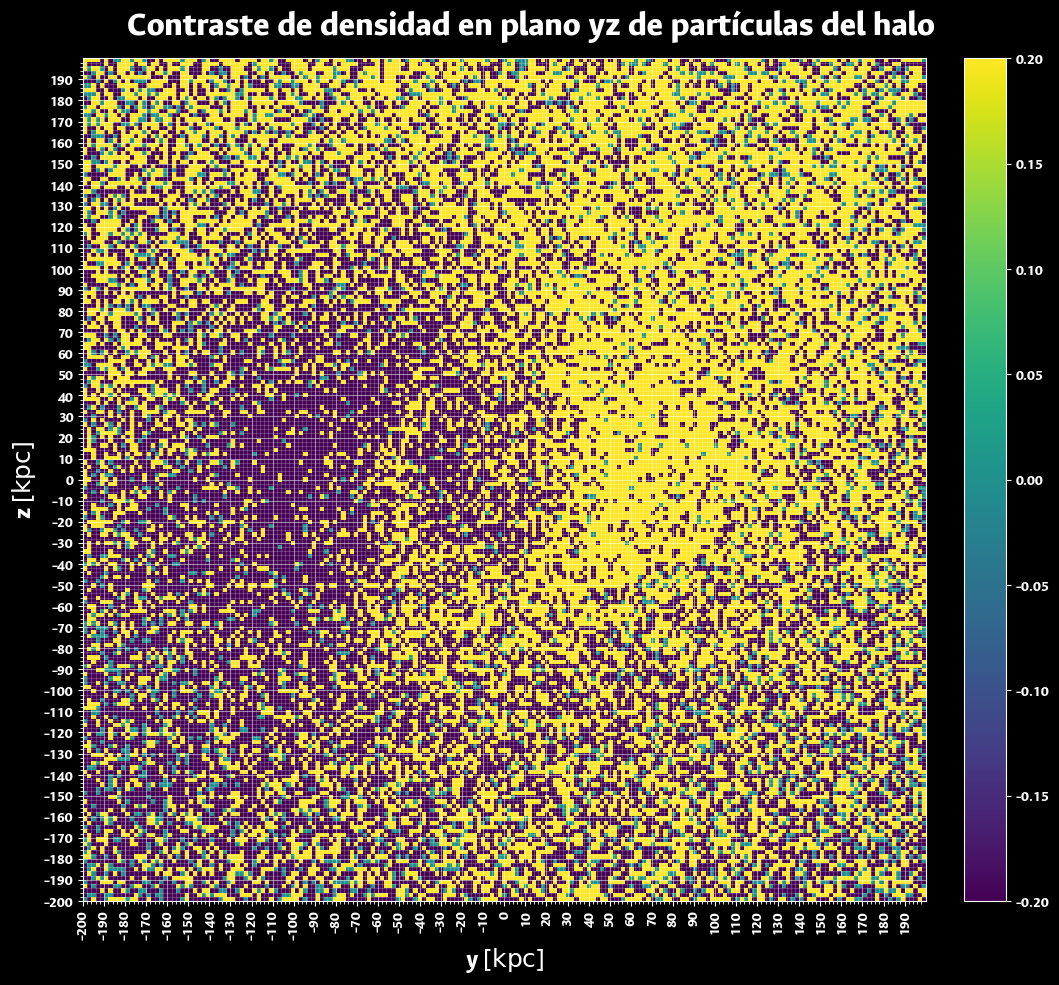

0

In [42]:

# hist_comparison(density_yz_mw, 'mw')
hist_comparison(div_yz_lmc, 'lmc_div')
hist_comparison(sus_yz_lmc, 'lmc_sus')



In [ ]:
def hist_comparison_zoom (density,figname):
    fig, ax = plt.subplots(1,1,figsize=(15,15))
    im = ax.imshow(density, vmin=-0.2, vmax=0.2, cmap='PuOr', extent=[-150,150,-150,150])
    major_ticks = np.arange(-150, 150, 10)
    minor_ticks = np.arange(-150, 150, 2)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    # ax.grid(which='both')
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)
    plt.colorbar(im, ax=ax,fraction=0.046, pad=0.04, cmap='PuOr')
    plt.suptitle("Contraste de densidad en el plano yz particulas en el halo perturbado", fontsize=24, y=1.05)
    plt.xlim(-50,95)
    plt.ylim(-50,95)
    # ax.grid(True, alpha=0.5)
    # plt.gca().invert_yaxis()
    plt.savefig('./../media/imgs/hist_comparison_zoom/'+figname+'.png', bbox_inches='tight', dpi = 300)
    plt.show()
    plt.close()
    return 0

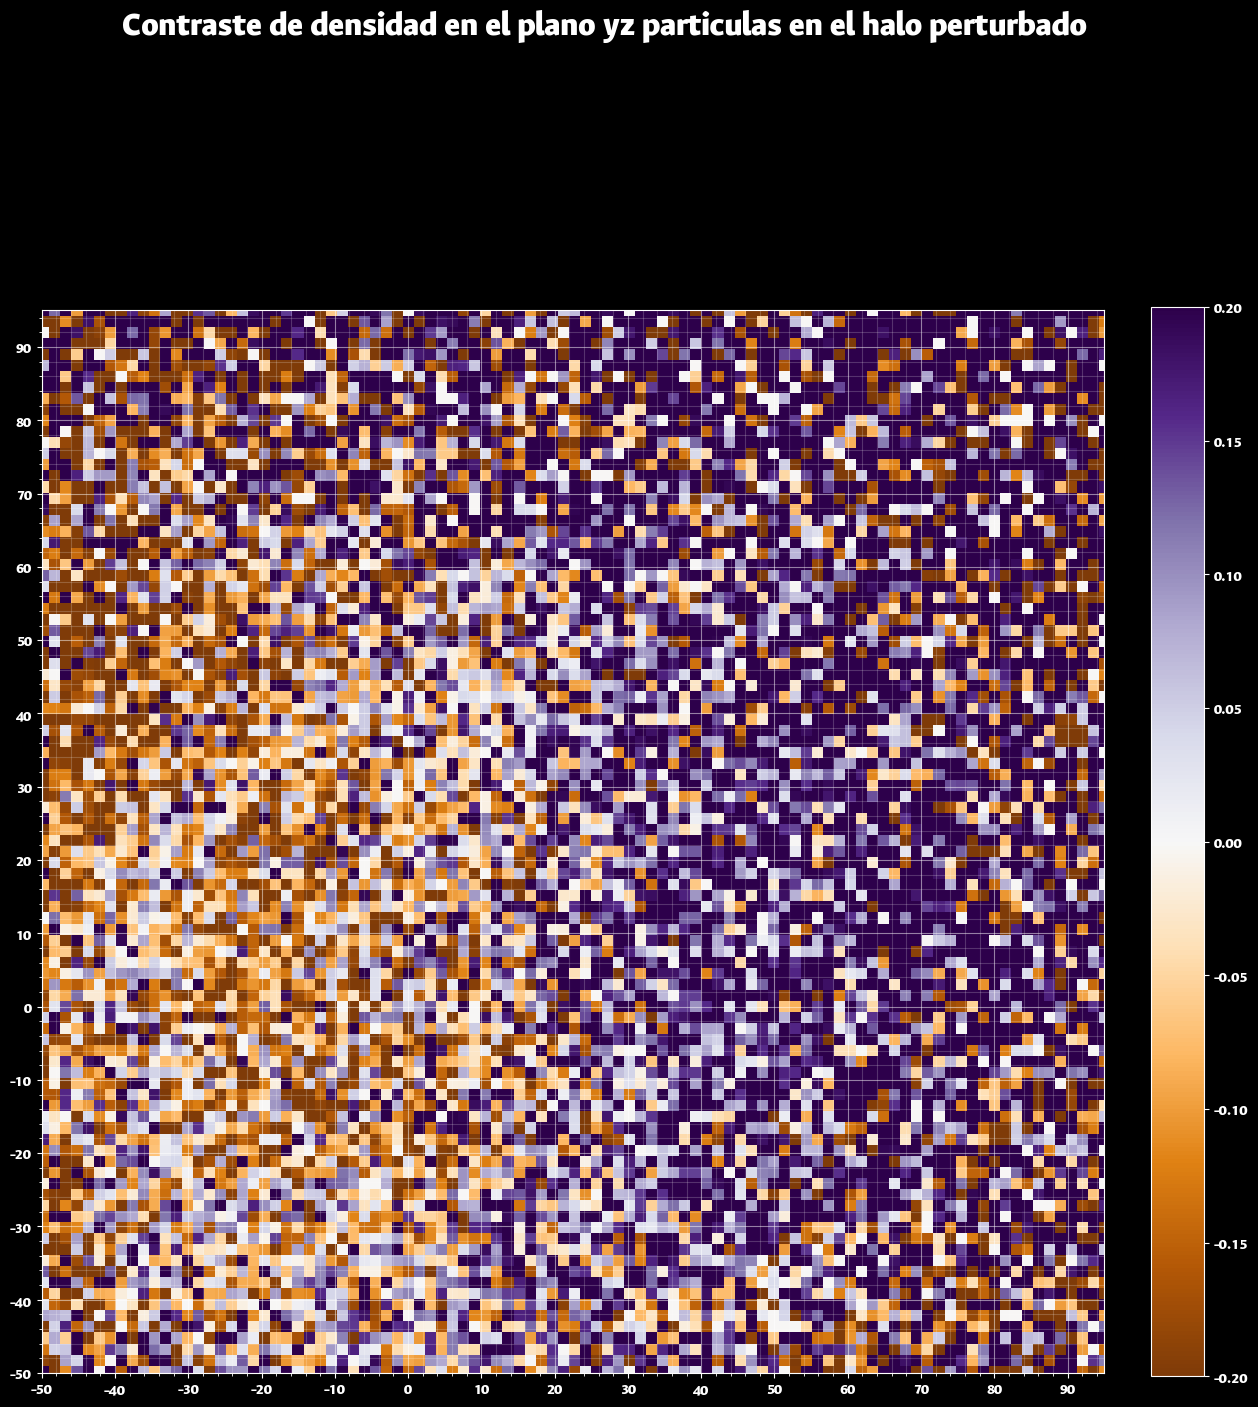

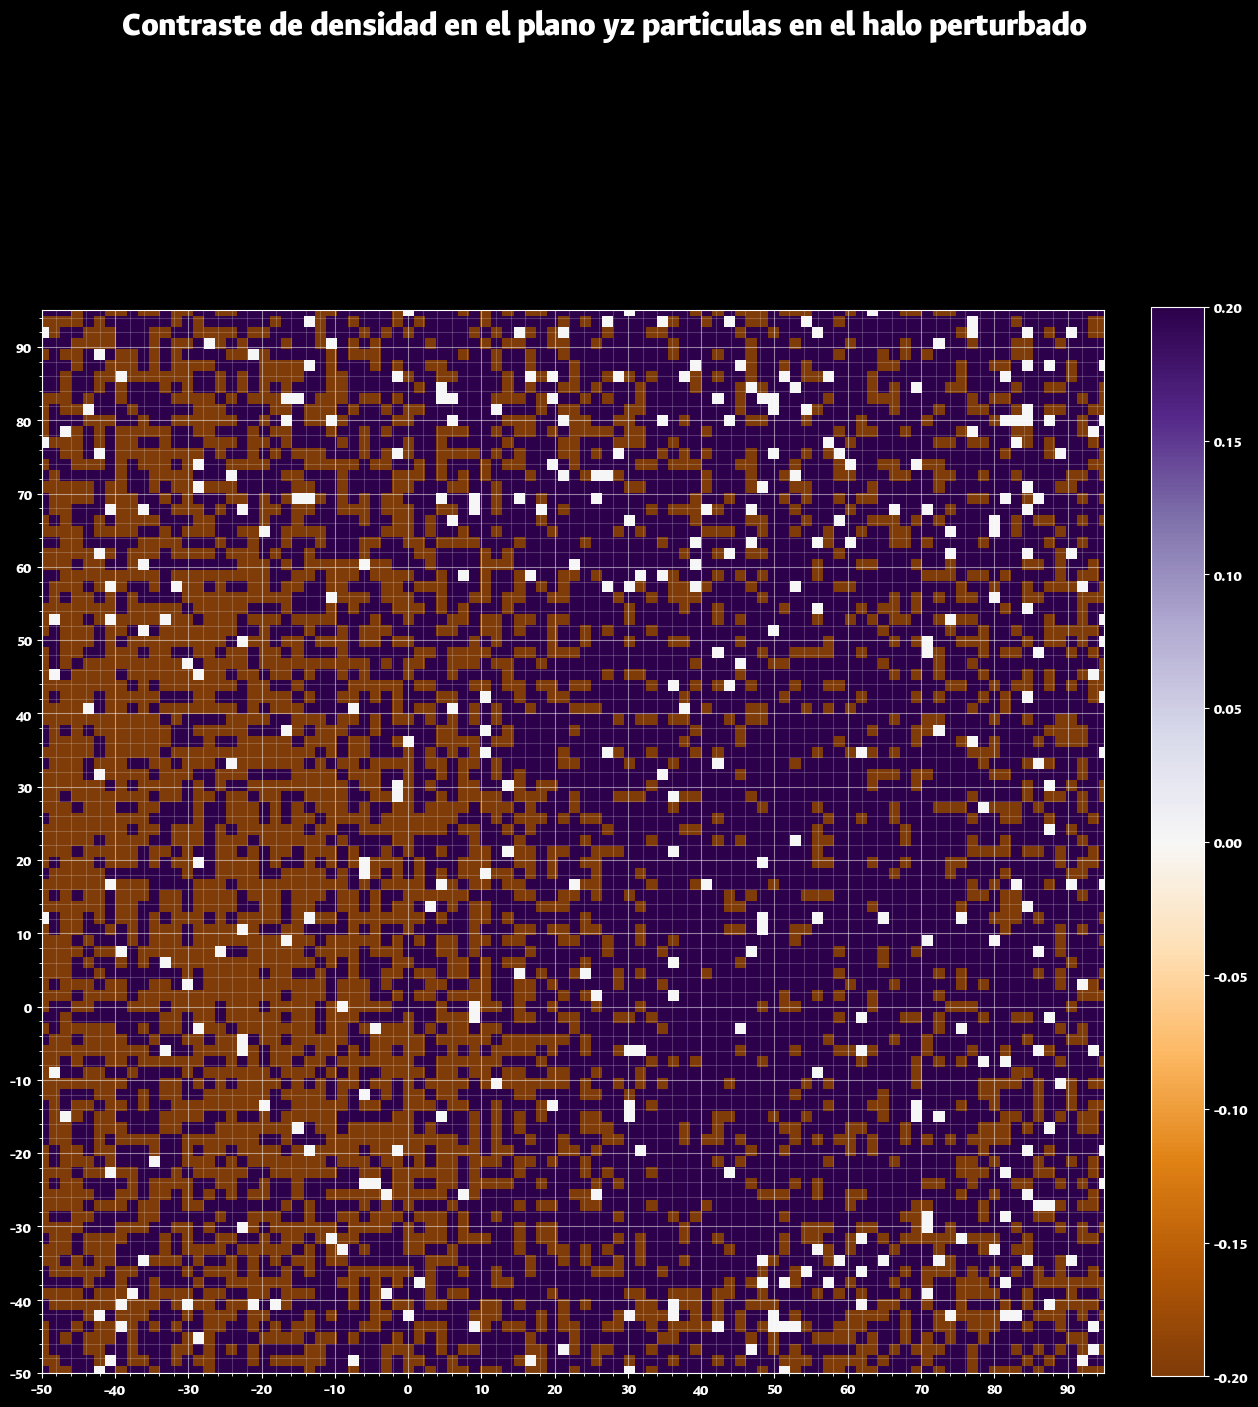

0

In [ ]:
# hist_comparison(density_yz_lmc_50, 'lmc_50')
hist_comparison_zoom(div_yz_lmc, 'lmc_div_zoom')
hist_comparison_zoom(sus_yz_lmc, 'lmc_sus_zoom')
